# Breast cancer Prediction using PYTHON

In [1]:
# importing libraries
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from matplotlib import style

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# returns the size of data set
df.shape

(569, 33)

In [7]:
# removing the column
df=df.dropna(axis=1)

In [8]:
# checking the dataset again after removing the null column
df.shape
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# describe the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
# get the count of B(Cancer cell absent) or M(Cancer found)
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [11]:
# label encoding  M and B to 1 and 0
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


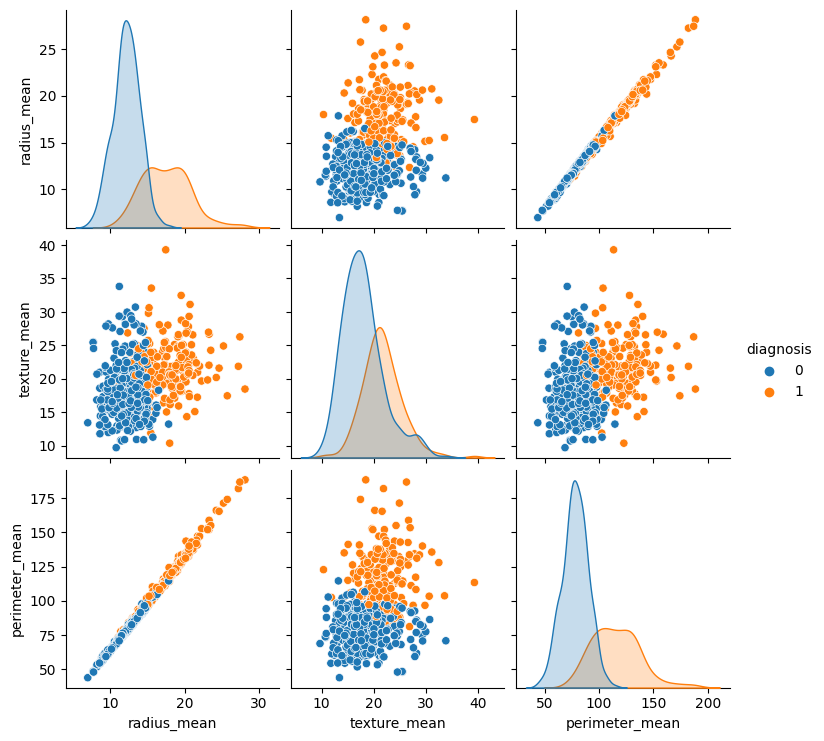

In [13]:
sns.pairplot(df.iloc[:,1:5],hue="diagnosis")

In [14]:
# get co-relation
df.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

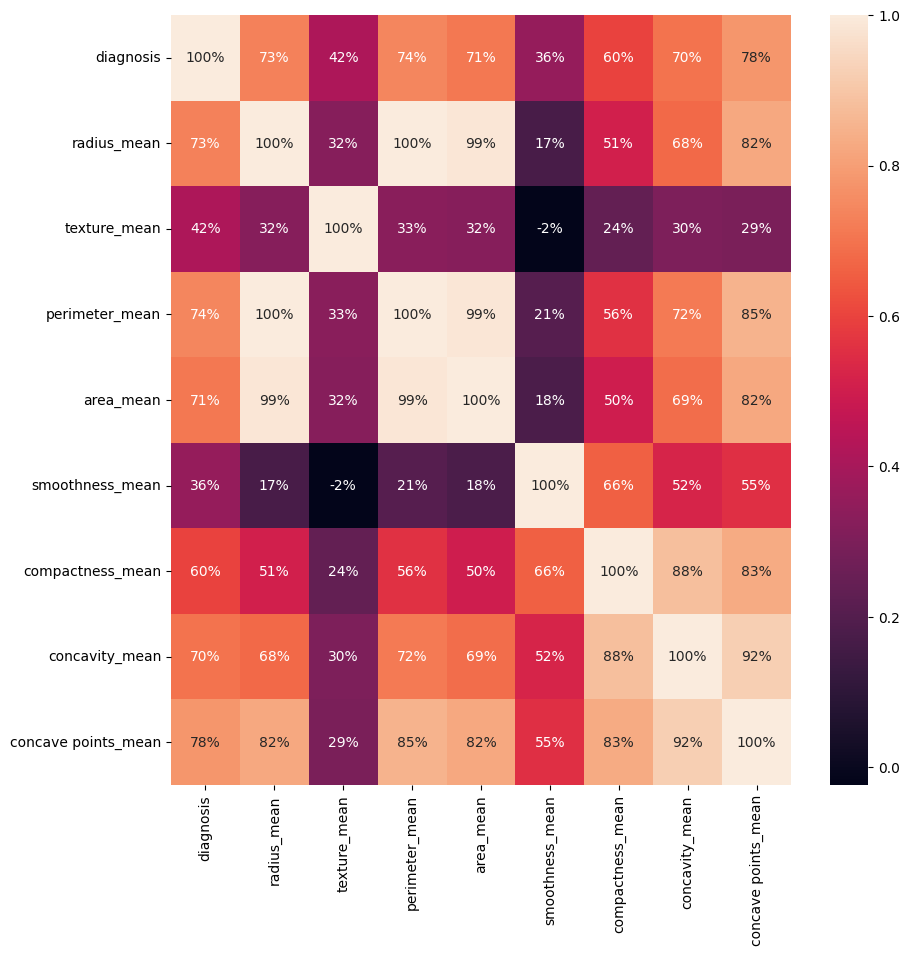

In [15]:
# visualize the co-relation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:10 ].corr(),annot=True,fmt=".0%")

In [16]:
# split the dataset
predictors=df.iloc[:,2:31].values
target=df.iloc[:,1].values

In [17]:
print(predictors)
print(target)

[[ 17.99    10.38   122.8    ...   0.7119   0.2654   0.4601]
 [ 20.57    17.77   132.9    ...   0.2416   0.186    0.275 ]
 [ 19.69    21.25   130.     ...   0.4504   0.243    0.3613]
 ...
 [ 16.6     28.08   108.3    ...   0.3403   0.1418   0.2218]
 [ 20.6     29.33   140.1    ...   0.9387   0.265    0.4087]
 [  7.76    24.54    47.92   ...   0.       0.       0.2871]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0

In [18]:
# splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(predictors,target,test_size=0.20,random_state=0)

In [19]:
# feature scaling
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [20]:
X_train_std

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.81232053,
        -0.75798367, -0.01614761],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.37504806,
        -0.60687023,  0.09669004],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.18298917,
        -0.02371948, -0.20050207],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.76769066,
        -0.97974953, -0.71542314],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.34136004,
        -1.75401433, -1.58157125],
       [-0.73694129,  1.14989702, -0.71226578, ...,  0.47893704,
        -0.27460457, -1.25895095]])

In [21]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report

In [23]:
def models(X_train,Y_train):
    
    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    log_pred=log.predict(X_test)
    print("**********Logistic Regression Test model********** \n")
    print(classification_report(Y_test,log_pred))
    LR_Score=round(accuracy_score(Y_test,log_pred)*100)
    print("Accuracy score  :",LR_Score,"%")
    print("Precision score :",round(precision_score(Y_test,log_pred)*100),"%")
    print("Recall score    :",round(recall_score(Y_test,log_pred)*100),"%")
    print("f1 score        :",round(f1_score(Y_test,log_pred)*100),"%")
    print("AUC score       :",round(roc_auc_score(Y_test,log_pred)*100),"%")
    
   
    #Decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(random_state=0,criterion="entropy")
    tree.fit(X_train,Y_train)
    tree_pred=tree.predict(X_test)
    print(" \n**********Decision Tree Test model**********\n")
    print(classification_report(Y_test,tree_pred))
    DT_Score=round(accuracy_score(Y_test,tree_pred)*100)
    print("Accuracy score  :",DT_Score,"%")
    print("Precision score :",round(precision_score(Y_test,tree_pred)*100),"%")
    print("Recall score    :",round(recall_score(Y_test,tree_pred)*100),"%")
    print("f1 score        :",round(f1_score(Y_test,tree_pred)*100),"%")
    print("AUC score       :",round(roc_auc_score(Y_test,tree_pred)*100),"%")
    
    
    #Random forest
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
    forest.fit(X_train,Y_train)
    forest_pred=forest.predict(X_test)
    print("\n**********Random Forest Test model********** \n")
    print(classification_report(Y_test,forest_pred))
    RF_Score=round(accuracy_score(Y_test,forest_pred)*100)
    print("Accuracy score  :",RF_Score,"%")
    print("Precision score :",round(precision_score(Y_test,forest_pred)*100),"%")
    print("Recall score    :",round(recall_score(Y_test,forest_pred)*100),"%")
    print("f1 score        :",round(f1_score(Y_test,forest_pred)*100),"%")
    print("AUC score       :",round(roc_auc_score(Y_test,forest_pred)*100),"%")
    
    
    
    #XG Boost 
    import xgboost as xgb
    xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=0)
    xgb_model.fit(X_train,Y_train)
    xgb_pred=xgb_model.predict(X_test)
    print("\n**********XG Boost Test model**********\n")
    print(classification_report(Y_test,xgb_pred))
    XGB_Score=round(accuracy_score(Y_test,xgb_pred)*100)
    print("Accuracy score  :",XGB_Score,"%")
    print("Precision score :",round(precision_score(Y_test, xgb_pred)*100),"%")
    print("Recall score    :",round(recall_score(Y_test, xgb_pred)*100),"%")
    print("f1 score        :",round(f1_score(Y_test, xgb_pred)*100),"%")
    print("AUC score       :",round(roc_auc_score(Y_test, xgb_pred)*100),"%")
    
    #Gausian Nave Bayes
    from sklearn.naive_bayes import GaussianNB
    GNB=GaussianNB()
    GNB.fit(X_train,Y_train)
    GNB_pred=GNB.predict(X_test)
    print("\n**********Gausian Nave Bayes Test model**********\n")
    print(classification_report(Y_test,GNB_pred))
    GNB_Score=round(accuracy_score(Y_test,GNB_pred)*100)
    print("Accuracy score  :",GNB_Score,"%")
    print("Precision score :",round(precision_score(Y_test,GNB_pred)*100),"%")
    print("Recall score    :",round(recall_score(Y_test,GNB_pred)*100),"%")
    print("f1 score        :",round(f1_score(Y_test,GNB_pred)*100),"%")
    print("AUC score       :",round(roc_auc_score(Y_test,GNB_pred)*100),"%")
    
    #SVM Support Vector Machine
    from sklearn import svm
    SVM= svm.SVC(kernel='linear')
    SVM.fit(X_train,Y_train)          # trainig the data
    SVM_pred = SVM.predict(X_test)
    print("\n**********SVM Test model**********\n")
    print(classification_report(Y_test,SVM_pred))
    SVM_Score=round(accuracy_score(Y_test,SVM_pred)*100)
    print("Accuracy score  :",SVM_Score,"%")
    print("Precision score :",round(precision_score(Y_test,SVM_pred)*100),"%")
    print("Recall score    :",round(recall_score(Y_test,SVM_pred)*100),"%")
    print("f1 score        :",round(f1_score(Y_test,SVM_pred)*100),"%")
    print("AUC score       :",round(roc_auc_score(Y_test,SVM_pred)*100),"%")
    
    #Multinomial Nave Bayes
    from sklearn.naive_bayes import MultinomialNB
    MNB = MultinomialNB() 
    MNB.fit(X_train,Y_train)          #training the data
    MNB_pred = MNB.predict(X_test)
    print("\n**********Multinomial Nave Bayes**********\n")
    print(classification_report(Y_test,MNB_pred))
    MNB_Score=round(accuracy_score(Y_test,MNB_pred)*100)
    print("Accuracy score  :",MNB_Score,"%")
    print("Precision score :",round(precision_score(Y_test, MNB_pred)*100),"%")
    print("Recall score    :",round(recall_score(Y_test, MNB_pred)*100),"%")
    print("f1 score        :",round(f1_score(Y_test, MNB_pred)*100),"%")
    print("AUC score       :",round(roc_auc_score(Y_test, MNB_pred)*100),"%")
    
    
    #Cat Boost
    from catboost import CatBoostClassifier
    CB = CatBoostClassifier()
    CB.fit(X_train,Y_train)           # training the data
    CB_pred = CB.predict(X_test)
    print("\n**********Cat Boost Test model**********\n")
    print(classification_report(Y_test,CB_pred))
    CB_Score=round(accuracy_score(Y_test,CB_pred)*100)
    print("Accuracy score  :",CB_Score,"%")
    print("Precision score :",round(precision_score(Y_test, CB_pred)*100),"%")
    print("Recall score    :",round(recall_score(Y_test, CB_pred)*100),"%")
    print("f1 score        :",round(f1_score(Y_test, CB_pred)*100),"%")
    print("AUC score       :",round(roc_auc_score(Y_test, CB_pred)*100),"%")
    
    return log,tree,forest,xgb_model,GNB,SVM,MNB,CB

# Testing the models


In [24]:
model=models(X_train,Y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**********Logistic Regression Test model********** 

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

Accuracy score  : 95 %
Precision score : 92 %
Recall score    : 96 %
f1 score        : 94 %
AUC score       : 95 %
 
**********Decision Tree Test model**********

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Accuracy score  : 93 %
Precision score : 90 %
Recall score    : 94 %
f1 score        : 92 %
AUC score       : 93 %

**********Rand

105:	learn: 0.1688952	total: 1.57s	remaining: 13.3s
106:	learn: 0.1673397	total: 1.6s	remaining: 13.3s
107:	learn: 0.1660279	total: 1.61s	remaining: 13.3s
108:	learn: 0.1646015	total: 1.62s	remaining: 13.3s
109:	learn: 0.1632931	total: 1.64s	remaining: 13.2s
110:	learn: 0.1619940	total: 1.65s	remaining: 13.2s
111:	learn: 0.1605479	total: 1.66s	remaining: 13.2s
112:	learn: 0.1591471	total: 1.68s	remaining: 13.2s
113:	learn: 0.1580946	total: 1.69s	remaining: 13.1s
114:	learn: 0.1566154	total: 1.7s	remaining: 13.1s
115:	learn: 0.1557975	total: 1.71s	remaining: 13s
116:	learn: 0.1542372	total: 1.72s	remaining: 13s
117:	learn: 0.1529585	total: 1.74s	remaining: 13s
118:	learn: 0.1513644	total: 1.75s	remaining: 12.9s
119:	learn: 0.1499156	total: 1.76s	remaining: 12.9s
120:	learn: 0.1484429	total: 1.77s	remaining: 12.9s
121:	learn: 0.1473402	total: 1.79s	remaining: 12.9s
122:	learn: 0.1461192	total: 1.8s	remaining: 12.8s
123:	learn: 0.1450346	total: 1.81s	remaining: 12.8s
124:	learn: 0.1441160

268:	learn: 0.0612155	total: 3.58s	remaining: 9.73s
269:	learn: 0.0608701	total: 3.59s	remaining: 9.72s
270:	learn: 0.0607014	total: 3.61s	remaining: 9.7s
271:	learn: 0.0604725	total: 3.62s	remaining: 9.69s
272:	learn: 0.0602310	total: 3.63s	remaining: 9.67s
273:	learn: 0.0599303	total: 3.64s	remaining: 9.65s
274:	learn: 0.0596646	total: 3.65s	remaining: 9.63s
275:	learn: 0.0593531	total: 3.67s	remaining: 9.62s
276:	learn: 0.0590646	total: 3.68s	remaining: 9.6s
277:	learn: 0.0587399	total: 3.69s	remaining: 9.58s
278:	learn: 0.0585144	total: 3.7s	remaining: 9.57s
279:	learn: 0.0581983	total: 3.71s	remaining: 9.55s
280:	learn: 0.0579000	total: 3.73s	remaining: 9.53s
281:	learn: 0.0575854	total: 3.74s	remaining: 9.52s
282:	learn: 0.0573490	total: 3.75s	remaining: 9.5s
283:	learn: 0.0571702	total: 3.76s	remaining: 9.48s
284:	learn: 0.0569575	total: 3.77s	remaining: 9.47s
285:	learn: 0.0566954	total: 3.79s	remaining: 9.46s
286:	learn: 0.0564959	total: 3.8s	remaining: 9.44s
287:	learn: 0.056

430:	learn: 0.0346501	total: 5.55s	remaining: 7.33s
431:	learn: 0.0345476	total: 5.57s	remaining: 7.32s
432:	learn: 0.0344666	total: 5.58s	remaining: 7.31s
433:	learn: 0.0343974	total: 5.59s	remaining: 7.29s
434:	learn: 0.0342954	total: 5.6s	remaining: 7.28s
435:	learn: 0.0341652	total: 5.62s	remaining: 7.26s
436:	learn: 0.0340993	total: 5.63s	remaining: 7.25s
437:	learn: 0.0340066	total: 5.64s	remaining: 7.24s
438:	learn: 0.0338762	total: 5.65s	remaining: 7.23s
439:	learn: 0.0337077	total: 5.67s	remaining: 7.21s
440:	learn: 0.0336022	total: 5.68s	remaining: 7.2s
441:	learn: 0.0335280	total: 5.69s	remaining: 7.18s
442:	learn: 0.0334187	total: 5.7s	remaining: 7.17s
443:	learn: 0.0333112	total: 5.71s	remaining: 7.16s
444:	learn: 0.0332373	total: 5.73s	remaining: 7.14s
445:	learn: 0.0331218	total: 5.74s	remaining: 7.13s
446:	learn: 0.0329823	total: 5.75s	remaining: 7.12s
447:	learn: 0.0328892	total: 5.77s	remaining: 7.1s
448:	learn: 0.0328328	total: 5.78s	remaining: 7.09s
449:	learn: 0.03

593:	learn: 0.0229160	total: 7.54s	remaining: 5.15s
594:	learn: 0.0228618	total: 7.55s	remaining: 5.14s
595:	learn: 0.0227981	total: 7.57s	remaining: 5.13s
596:	learn: 0.0227297	total: 7.58s	remaining: 5.12s
597:	learn: 0.0227157	total: 7.59s	remaining: 5.1s
598:	learn: 0.0226631	total: 7.61s	remaining: 5.09s
599:	learn: 0.0226027	total: 7.62s	remaining: 5.08s
600:	learn: 0.0225659	total: 7.63s	remaining: 5.07s
601:	learn: 0.0225082	total: 7.64s	remaining: 5.05s
602:	learn: 0.0224454	total: 7.65s	remaining: 5.04s
603:	learn: 0.0223767	total: 7.67s	remaining: 5.03s
604:	learn: 0.0223112	total: 7.68s	remaining: 5.01s
605:	learn: 0.0222754	total: 7.69s	remaining: 5s
606:	learn: 0.0222251	total: 7.7s	remaining: 4.99s
607:	learn: 0.0221722	total: 7.71s	remaining: 4.97s
608:	learn: 0.0221262	total: 7.72s	remaining: 4.96s
609:	learn: 0.0220723	total: 7.74s	remaining: 4.95s
610:	learn: 0.0220164	total: 7.75s	remaining: 4.93s
611:	learn: 0.0219504	total: 7.76s	remaining: 4.92s
612:	learn: 0.021

765:	learn: 0.0159306	total: 9.67s	remaining: 2.95s
766:	learn: 0.0159008	total: 9.69s	remaining: 2.94s
767:	learn: 0.0158738	total: 9.7s	remaining: 2.93s
768:	learn: 0.0158379	total: 9.71s	remaining: 2.92s
769:	learn: 0.0158034	total: 9.72s	remaining: 2.9s
770:	learn: 0.0157781	total: 9.74s	remaining: 2.89s
771:	learn: 0.0157543	total: 9.75s	remaining: 2.88s
772:	learn: 0.0157320	total: 9.76s	remaining: 2.87s
773:	learn: 0.0156986	total: 9.77s	remaining: 2.85s
774:	learn: 0.0156638	total: 9.78s	remaining: 2.84s
775:	learn: 0.0156318	total: 9.79s	remaining: 2.83s
776:	learn: 0.0155949	total: 9.81s	remaining: 2.81s
777:	learn: 0.0155685	total: 9.82s	remaining: 2.8s
778:	learn: 0.0155553	total: 9.83s	remaining: 2.79s
779:	learn: 0.0155389	total: 9.85s	remaining: 2.78s
780:	learn: 0.0154966	total: 9.86s	remaining: 2.77s
781:	learn: 0.0154706	total: 9.88s	remaining: 2.75s
782:	learn: 0.0154490	total: 9.89s	remaining: 2.74s
783:	learn: 0.0154304	total: 9.91s	remaining: 2.73s
784:	learn: 0.0

927:	learn: 0.0121727	total: 11.7s	remaining: 904ms
928:	learn: 0.0121579	total: 11.7s	remaining: 891ms
929:	learn: 0.0121360	total: 11.7s	remaining: 879ms
930:	learn: 0.0121186	total: 11.7s	remaining: 867ms
931:	learn: 0.0120954	total: 11.7s	remaining: 854ms
932:	learn: 0.0120771	total: 11.7s	remaining: 841ms
933:	learn: 0.0120510	total: 11.7s	remaining: 829ms
934:	learn: 0.0120402	total: 11.7s	remaining: 816ms
935:	learn: 0.0120161	total: 11.7s	remaining: 803ms
936:	learn: 0.0119943	total: 11.8s	remaining: 791ms
937:	learn: 0.0119788	total: 11.8s	remaining: 778ms
938:	learn: 0.0119472	total: 11.8s	remaining: 766ms
939:	learn: 0.0119290	total: 11.8s	remaining: 753ms
940:	learn: 0.0119076	total: 11.8s	remaining: 740ms
941:	learn: 0.0118899	total: 11.8s	remaining: 728ms
942:	learn: 0.0118762	total: 11.8s	remaining: 715ms
943:	learn: 0.0118557	total: 11.8s	remaining: 703ms
944:	learn: 0.0118223	total: 11.9s	remaining: 691ms
945:	learn: 0.0118108	total: 11.9s	remaining: 678ms
946:	learn: 

# Final Output

In [25]:
algo=["Logistic Regression [0]","Decision Tree [1]","Random Forest [2]","XG Boost [3]","Nave Bayes","Support Vector Machine","Multinomial Nave Bayes","Cat Boost"]
for i in range(len(model)):
    score=round(accuracy_score(Y_test,model[i].predict(X_test))*100)
    print("{} algorithm has : {} % Accuracy.".format(algo[i],score))

Logistic Regression [0] algorithm has : 95 % Accuracy.
Decision Tree [1] algorithm has : 93 % Accuracy.
Random Forest [2] algorithm has : 97 % Accuracy.
XG Boost [3] algorithm has : 96 % Accuracy.
Nave Bayes algorithm has : 93 % Accuracy.
Support Vector Machine algorithm has : 96 % Accuracy.
Multinomial Nave Bayes algorithm has : 89 % Accuracy.
Cat Boost algorithm has : 97 % Accuracy.


# HIGHEST ACCURACY IS ATTAINED BY RANDOM FOREST and CAT BOOST

In [26]:
#prediction using Random Forest
pred_rf=model[2].predict(X_test)
print("Predicted value using Random Forest :")
print(pred_rf)
print("Actual value using Random Forest :")
print(Y_test)

#prediction using Cat Boost
pred_cb=model[7].predict(X_test)
print("\n\nPredicted value using Cat Boost :")
print(pred_cb)
print("Actual value using Cat Boost :")
print(Y_test)

Predicted value using Random Forest :
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]
Actual value using Random Forest :
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


Predicted value using Cat Boost :
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]
Actual value using Cat Boost :
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 

Text(0, 0.5, 'Accuracy Score')

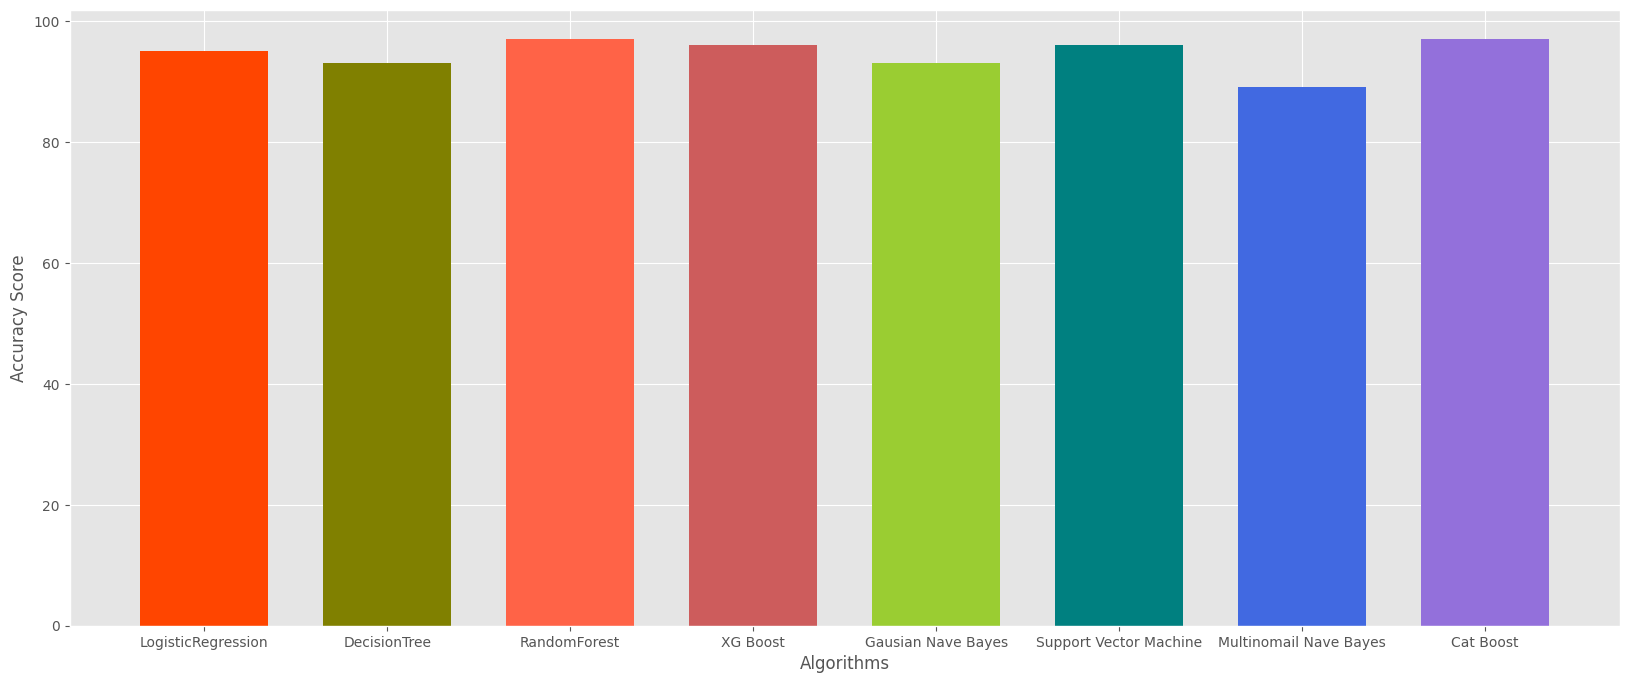

In [27]:
style.use("ggplot")
plt.figure(figsize=(20,8))
data = {'LogisticRegression':95, 'DecisionTree':93, 'RandomForest':97,'XG Boost':96,'Gausian Nave Bayes':93,'Support Vector Machine':96,'Multinomail Nave Bayes':89,'Cat Boost':97}
values = list(data.values())
output=list(data.keys())
color = ["orangered","olive","tomato","indianred","yellowgreen","teal","royalblue","mediumpurple"]
plt.bar(output,values,color=color,width=0.7)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

 So, Maximum Accuracy achieved by both Random Forest and Cat Boost

In [28]:
from joblib import dump
dump(model[2],"Cancer_prediction_model.joblib")


['Cancer_prediction_model.joblib']